<a href="https://colab.research.google.com/github/Jessica0100/data/blob/main/21_209_tugasdataIris_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#(untuk membaca file .xlsx)
!pip install openpyxl scikit-learn matplotlib pandas


In [2]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files


In [3]:
# Upload file iris.xlsx
uploaded = files.upload()


Saving iris.xlsx to iris.xlsx


In [4]:
file_name = 'iris.xlsx'

# Baca file Excel ke dalam DataFrame
df = pd.read_excel(file_name)

# Tampilkan 5 baris pertama
print("Data Awal:")
print(df.head())

# Hapus kolom yang tidak dibutuhkan untuk clustering (id dan Class)
features = df.drop(columns=['id', 'Class'])


Data Awal:
   id        Class  petal length  petal width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2


In [5]:
# Siapkan variabel untuk menyimpan hasil evaluasi
sse = []
silhouette_scores = []
k_values = range(2, 5)  # Uji untuk k=2 sampai 4

# Lakukan clustering untuk setiap k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(features)

    # Hitung dan simpan SSE dan Silhouette Score
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features, cluster_labels))


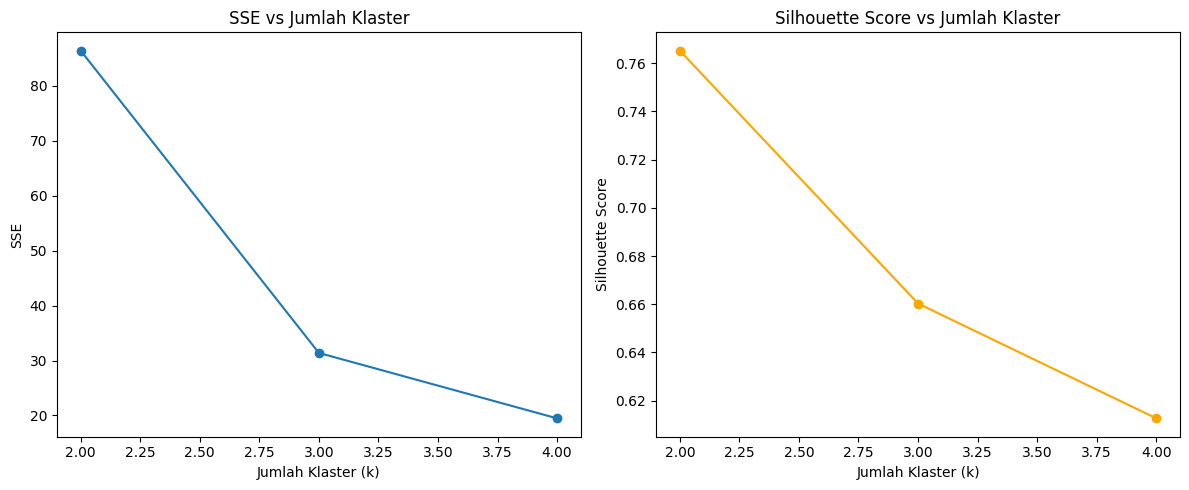

In [6]:
# Visualisasi dalam 2 grafik
plt.figure(figsize=(12, 5))

# Grafik SSE
plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('SSE vs Jumlah Klaster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')

# Grafik Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Jumlah Klaster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [7]:
# Tampilkan nilai evaluasi dalam bentuk DataFrame
result = pd.DataFrame({
    'Jumlah Klaster (k)': list(k_values),
    'SSE': sse,
    'Silhouette Score': silhouette_scores
})

print("Hasil Evaluasi Clustering:")
print(result)


Hasil Evaluasi Clustering:
   Jumlah Klaster (k)        SSE  Silhouette Score
0                   2  86.403945          0.765176
1                   3  31.387759          0.660276
2                   4  19.482389          0.612644
